In [97]:
import os
import pandas as pd

In [99]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [100]:
pwd

'/home/nbuser/library/Taller01'

## IDEAM

In [101]:
base_dir = os.path.join( '.','data')
output_dir = os.path.join( '.','output')
ciudad = 'Medellin'
fuente = 'IDEAM'
serie_csv = os.path.join(base_dir,ciudad,fuente+'.csv')
serie_pd = pd.read_csv(serie_csv, sep = ';', encoding='latin-1')

In [102]:
def ghi_mensual(serie_horaria):
    agnos = sorted(serie_horaria['AÑO'].unique())
    ghi_df = pd.DataFrame(columns=["AÑO", "MES", "DIAS", "GHImes"])
    for agno in agnos:
        for mes in range(1,13):
            nombre_energia = list(serie_horaria)[-1]
            dias = sorted(serie_horaria[(serie_horaria['AÑO'] == agno) & (serie_horaria['MES'] == mes)]["DIA"].unique())
            ghi_mes = serie_horaria.loc[((serie_horaria["AÑO"] == agno) & (serie_horaria["MES"] == mes)), nombre_energia].sum()/1000
            ghi_dict = {"AÑO":agno, "MES":mes, "DIAS":dias[-1], "GHImes":ghi_mes}
            ghi_df = ghi_df.append(ghi_dict, ignore_index=True)
    return ghi_df

def ghi_dia(serie_ghi_mensual):
    agnos = sorted(serie_ghi_mensual['AÑO'].unique())
    ghi_df = pd.DataFrame(columns=["AÑO", "MES", "GHIdiario"])
    for agno in agnos:
        for mes in range(1,13):
            dias = serie_ghi_mensual.loc[((serie_ghi_mensual["AÑO"] == agno) & (serie_ghi_mensual["MES"] == mes)), "DIAS"].item()
            ghi_diario = serie_ghi_mensual.loc[((serie_ghi_mensual["AÑO"] == agno) & (serie_ghi_mensual["MES"] == mes)), "GHImes"].item()/dias
            ghi_dict = {"AÑO":agno, "MES":mes, "GHIdiario":ghi_diario}
            ghi_df = ghi_df.append(ghi_dict, ignore_index=True)
    return ghi_df

In [103]:
ghi_mensual_loc = ghi_mensual(serie_pd)
ghi_diario_loc = ghi_dia(ghi_mensual_loc)
datos_IDEAM = sorted(ghi_diario_loc["GHIdiario"])

# Calculo de ENFICC

In [104]:
percentil = 0.01
enficc = ghi_diario_loc.quantile(q=percentil, numeric_only=True)["GHIdiario"]
print('La ENFICC 99% es: ', enficc)

La ENFICC 99% es:  3.53519358791


## NREL

In [105]:
base_dir = os.path.join( '.','data')
output_dir = os.path.join( '.','output')
ciudad = 'Medellin'
fuente = 'NREL'
serie_csv_nrel = os.path.join(base_dir,ciudad,fuente+'.csv')
serie_pd_nrel = pd.read_csv(serie_csv_nrel, sep = ';', encoding='latin-1')

In [106]:
ghi_mensual_loc2 = ghi_mensual(serie_pd_nrel)
ghi_diario_loc2 = ghi_dia(ghi_mensual_loc2)
datos_NREL = sorted(ghi_diario_loc2["GHIdiario"])

# Gráfica comparativa IDEAM y ENFICC

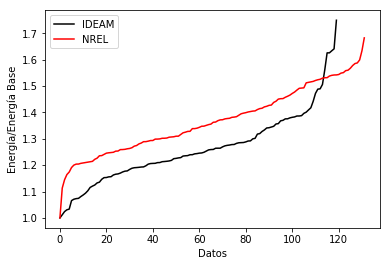

In [107]:
pylab.xlabel("Datos")
pylab.ylabel("Energía/Energía Base")
numdatos = range(len(datos_IDEAM))
numdatosnrel=range(len(datos_NREL))
pylab.plot(numdatos,datos_IDEAM/datos_IDEAM[0],'-k', label='IDEAM')
pylab.plot(numdatosnrel,datos_NREL/datos_NREL[0],'-r', label='NREL')
pylab.legend(loc='upper left')
pylab.savefig(os.path.join(output_dir,'medellin_IDEAM.png'), dpi=600)

# Metodología Medición-Correlación-Predicción (MCP)

In [108]:
#Función para seleccionar un período de datos de la lista de IDEAM. 
#NOTA: Si se quiere ver en un año/mes los parametros deben ser el año/mes, el año/mes+1
def periodo (serie_larga, agno_inicio, agno_final, mes_inicio, mes_final):
    a=[]
    for agno in range(agno_inicio, agno_final):
        for mes in range(mes_inicio,mes_final):
            datos=serie_larga.loc[(serie_pd["AÑO"] == agno)& (serie_pd["MES"] == mes)]
            a.append(datos)
            ghi_df = pd.concat(a, ignore_index=True)
    return ghi_df

In [111]:
#Ejemplo y prueba de la función período
periodo(serie_pd, 2014, 2015, 1, 13)

,AÑO,MES,DIA,HORA,IDEAM
0,2014,1,1,0,0.000000
1,2014,1,1,1,0.000000
2,2014,1,1,2,0.000000
3,2014,1,1,3,0.000000
4,2014,1,1,4,0.000000
5,2014,1,1,5,0.000000
6,2014,1,1,6,0.000000
7,2014,1,1,7,10.008513
8,2014,1,1,8,63.342047
9,2014,1,1,9,186.004424


In [112]:
#Función para seleccionar un período de datos de la lista de NREL. 
#NOTA: Si se quiere ver en un año/mes los parametros deben ser el (año/mes, el año/mes+1)
#NOTA 2: Si se quiere observar mas de un año esta debe ser del año completo, pues si se selecciona un periodo de meses solo evaluara dicho periodo en dichos años mas NO el primer año completo y el siguiente año hasta el mes deseado.
def nrel_periodo (serie_larga, agno_inicio, agno_final, mes_inicio, mes_final):
    a=[]
    for agno in range(agno_inicio, agno_final):
        for mes in range(mes_inicio,mes_final):
            datos=serie_larga.loc[(serie_pd_nrel["AÑO"] == agno)& (serie_pd_nrel["MES"] == mes)]
            a.append(datos)
            ghi_df = pd.concat(a, ignore_index=True)
    return ghi_df

In [129]:
#Ejemplo y prueba de la función nrel_período
nrel_periodo(serie_pd_nrel, 2014, 2015, 1, 2)

,AÑO,MES,DIA,HORA,NREL
0,2014,1,1,0,0.0
1,2014,1,1,1,0.0
2,2014,1,1,2,0.0
3,2014,1,1,3,0.0
4,2014,1,1,4,0.0
5,2014,1,1,5,0.0
6,2014,1,1,6,12.5
7,2014,1,1,7,137.5
8,2014,1,1,8,229.0
9,2014,1,1,9,198.5


In [114]:
#Ajuste MCP
op_ideam=periodo(serie_pd, 2014, 2015, 1, 13)
op_nrel=nrel_periodo(serie_pd_nrel, 2014, 2015, 1, 13)

mean_y=op_ideam['IDEAM'].mean()
mean_x=op_nrel['NREL'].mean()
std_y=op_ideam['IDEAM'].std()
std_x=op_nrel['NREL'].std()

def ajuste (ideam, nrel):
    mean_y=ideam['IDEAM'].mean()
    mean_x=nrel['NREL'].mean()
    std_y=ideam['IDEAM'].std()
    std_x=nrel['NREL'].std()
    a=(mean_y-((std_y/std_x)*mean_x)+((std_y/std_x)*serie_pd_nrel['NREL']))
    return a

In [115]:
#Datos de radiacion ajustados
radiacion_ajustada=ajuste(op_ideam, op_nrel)
radiacion_ajustada

0         -7.588932
1         -7.588932
2         -7.588932
3         -7.588932
4         -7.588932
5         -7.588932
6          3.447637
7         83.793859
8        177.383964
9        414.449464
10       704.049033
11       687.714911
12       717.292915
13       692.129538
14       591.917492
15       498.768851
16       298.786222
17        99.245056
18        -7.588932
19        -7.588932
20        -7.588932
21        -7.588932
22        -7.588932
23        -7.588932
24        -7.588932
25        -7.588932
26        -7.588932
27        -7.588932
28        -7.588932
29        -7.588932
            ...    
96378     -7.588932
96379     -7.588932
96380     -7.588932
96381     -7.588932
96382     -7.588932
96383     -7.588932
96384     -7.588932
96385     -7.588932
96386     -7.588932
96387     -7.588932
96388     -7.588932
96389     -7.588932
96390      5.213488
96391    152.662049
96392    359.708082
96393    548.654142
96394    694.336852
96395    782.629403
96396    604.278449


In [116]:
#Creación de un nuevo data frame con la informacion ajustada
lineas={'AÑO':serie_pd_nrel['AÑO'],'MES':serie_pd_nrel['MES'],'DIA':serie_pd_nrel['DIA'],'HORA':serie_pd_nrel['HORA'],'NREL':radiacion_ajustada}
lineas_data=pd.DataFrame(lineas)
lineas_data

,AÑO,DIA,HORA,MES,NREL
0,2005,1,0,1,-7.588932
1,2005,1,1,1,-7.588932
2,2005,1,2,1,-7.588932
3,2005,1,3,1,-7.588932
4,2005,1,4,1,-7.588932
5,2005,1,5,1,-7.588932
6,2005,1,6,1,3.447637
7,2005,1,7,1,83.793859
8,2005,1,8,1,177.383964
9,2005,1,9,1,414.449464


In [117]:
#Promedios mensuales y totales, tal como la primera parte del ejercicio pero para datos ajustados
ghi_mensual_ajuste = ghi_mensual(lineas_data)
ghi_diario_ajuste = ghi_dia(ghi_mensual_ajuste)
datos_AJUSTE = sorted(ghi_diario_ajuste["GHIdiario"])

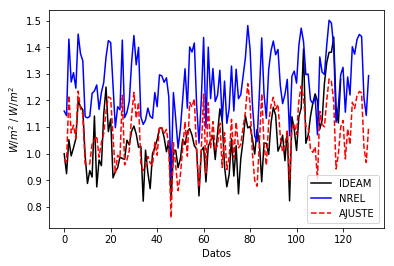

In [118]:
pylab.xlabel("Datos")
pylab.ylabel("$W/{m^{2}}$ / $W/{m^{2}}$")
mensual_ideam=range(len(ghi_mensual_loc))
mensual_nrel=range(len(ghi_mensual_loc2))
numdatosnrel_ajuste=range(len(ghi_diario_ajuste ))
pylab.plot(mensual_ideam,ghi_mensual_loc['GHImes']/ghi_mensual_loc['GHImes'][0],'-k', label='IDEAM')
pylab.plot(mensual_nrel,ghi_mensual_loc2['GHImes']/ghi_mensual_loc['GHImes'][0],'-b', label='NREL')
pylab.plot(numdatosnrel_ajuste,ghi_mensual_ajuste['GHImes']/ghi_mensual_loc['GHImes'][0],'--r', label='AJUSTE')
pylab.legend(loc='lower right')
pylab.savefig(os.path.join(output_dir,'medellin_corregido.png'), dpi=600)

# Calculo de errores

## RMSEn

In [151]:
# Para el calculo de este tipo de error se utiliza la ecuacion del protocolo
#Creación de un nuevo data frame para guardar los datos de IDEAM y NREL, esto para que tengan el mismo nombre y Python pueda hacer operaciones
obs={'ERR':serie_pd['IDEAM']}
observado=pd.DataFrame(obs)
mo={'ERR':serie_pd_nrel['NREL']}
mod=pd.DataFrame(mo)
# Primero se definen variables
x_obs=observado.loc[0:len(observado['ERR']),['ERR']]
x_mod=mod.loc[0:len(observado['ERR'])-1,['ERR']]
n=len(x_obs)

In [152]:
# Se comprueba que el tamaño n de los datos sea el mismo para el calculo
len(x_mod)==len(x_obs)

True

In [153]:
#Calculo
def RMSEn(xmo):
    x=(sqrt((1/n)*(((x_obs-xmo)**2).sum())))/(x_obs.max()-x_obs.min())
    return x
print('El error RMSEn es: ', RMSEn(x_mod))

El error RMSEn es:  ERR    0.137838
dtype: float64


## MBE

In [154]:
# Se utilizan las mismas listas creadas para el RMSEn
# Calculo
def MBE(xmo):
    x=((xmo-x_obs).sum())/x_obs.sum()
    return x
print('El error MBE es: ', MBE(x_mod))

El error MBE es:  ERR    0.192566
dtype: float64


## KSI

# Comparacion con datos ajustados

In [171]:
# Se definen diferentes periodos de tiempo para evaluar
op_ideam=periodo(serie_pd, 2014, 2015, 1, 13)
op_nrel=nrel_periodo(serie_pd_nrel, 2014, 2015, 1, 13)
op_ideam1=periodo(serie_pd, 2006, 2008, 1, 9)
op_nrel1=nrel_periodo(serie_pd_nrel, 2006, 2008, 1, 9)
op_ideam2=periodo(serie_pd, 2007, 2008, 4, 13)
op_nrel2=nrel_periodo(serie_pd_nrel, 2007, 2008, 4, 13)
op_ideam3=periodo(serie_pd, 2010, 2013, 1, 13)
op_nrel3=nrel_periodo(serie_pd_nrel, 2010, 2013, 1, 13)
op_ideam4=periodo(serie_pd, 2009, 2011, 1, 13)
op_nrel4=nrel_periodo(serie_pd_nrel, 2009, 2011, 1, 13)
op_ideam5=periodo(serie_pd, 2008, 2009, 3, 6)
op_nrel5=nrel_periodo(serie_pd_nrel, 2008, 2009, 3, 6)
op_ideam6=periodo(serie_pd, 2009, 2010, 1, 7)
op_nrel6=nrel_periodo(serie_pd_nrel, 2009, 2010, 1, 7)
op_ideam7=periodo(serie_pd, 2006, 2007, 1, 13)
op_nrel7=nrel_periodo(serie_pd_nrel, 2006, 2007, 1, 13)

radiacion_ajustada=ajuste(op_ideam, op_nrel)
radiacion_ajustada1=ajuste(op_ideam1, op_nrel1)
radiacion_ajustada2=ajuste(op_ideam2, op_nrel2)
radiacion_ajustada3=ajuste(op_ideam3, op_nrel3)
radiacion_ajustada4=ajuste(op_ideam4, op_nrel4)
radiacion_ajustada5=ajuste(op_ideam5, op_nrel5)
radiacion_ajustada6=ajuste(op_ideam6, op_nrel6)
radiacion_ajustada7=ajuste(op_ideam7, op_nrel7)

mo0={'ERR':radiacion_ajustada}
mod0=pd.DataFrame(mo0)
mo1={'ERR':radiacion_ajustada1}
mod1=pd.DataFrame(mo1)
mo2={'ERR':radiacion_ajustada2}
mod2=pd.DataFrame(mo2)
mo3={'ERR':radiacion_ajustada3}
mod3=pd.DataFrame(mo3)
mo4={'ERR':radiacion_ajustada4}
mod4=pd.DataFrame(mo4)
mo5={'ERR':radiacion_ajustada5}
mod5=pd.DataFrame(mo5)
mo6={'ERR':radiacion_ajustada6}
mod6=pd.DataFrame(mo6)
mo7={'ERR':radiacion_ajustada7}
mod7=pd.DataFrame(mo7)

x_mod0=mod0.loc[0:len(observado['ERR'])-1]
x_mod1=mod1.loc[0:len(observado['ERR'])-1]
x_mod2=mod2.loc[0:len(observado['ERR'])-1]
x_mod3=mod3.loc[0:len(observado['ERR'])-1]
x_mod4=mod4.loc[0:len(observado['ERR'])-1]
x_mod5=mod5.loc[0:len(observado['ERR'])-1]
x_mod6=mod6.loc[0:len(observado['ERR'])-1]
x_mod7=mod7.loc[0:len(observado['ERR'])-1]

In [172]:
lista_errores={'RMSEn':[RMSEn(x_mod),RMSEn(x_mod0),RMSEn(x_mod1),RMSEn(x_mod2),RMSEn(x_mod3),RMSEn(x_mod4),RMSEn(x_mod5),RMSEn(x_mod6),RMSEn(x_mod7)],'MBE':[MBE(x_mod),MBE(x_mod0),MBE(x_mod1),MBE(x_mod2),MBE(x_mod3),MBE(x_mod4),MBE(x_mod5),MBE(x_mod6),MBE(x_mod7)]}
errores=pd.DataFrame(lista_errores)
errores

,MBE,RMSEn
0,ERR 0.192566 dtype: float64,ERR 0.137838 dtype: float64
1,ERR 0.011592 dtype: float64,ERR 0.122851 dtype: float64
2,ERR -0.019066 dtype: float64,ERR 0.121348 dtype: float64
3,ERR -0.009697 dtype: float64,ERR 0.121614 dtype: float64
4,ERR -0.037726 dtype: float64,ERR 0.11953 dtype: float64
5,ERR -0.01896 dtype: float64,ERR 0.119614 dtype: float64
6,ERR 0.034871 dtype: float64,ERR 0.124502 dtype: float64
7,ERR 0.027527 dtype: float64,ERR 0.122238 dtype: float64
8,ERR -0.021449 dtype: float64,ERR 0.12155 dtype: float64
